# Week3授業課題 信用情報を分析しよう

# 1.この課題の目的
- 実データに近いものの分析を行う
- データセットに対して自ら課題を設定できるようにする

# 2.信用情報
Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。

# 【問題1】コンペティション内容の把握
以下の観点に気をつけて、どのようなコンペティションなのかレポートしてください。

- このコンペティションでは何を予測する？目的変数は？
- 企業がこのコンペティションを開催することで得られるメリットは？
- データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？



## このコンペティションでは何を予測する？
- どのようなデータか？　→　ローンを利用し完済または完済できなかった307511人分の債務者の個人情報(特徴量120個)である。
- 何を予測する？　→　それぞれの債務者の各特徴量から、ローンを完済できる確率を予測する。

## 目的変数は？
- application_train.csv のデータの中の左から２列目の「TARGET」が目的変数であり、ローンの完済ができた場合は「0」、完済できなかった場合は「1」が入力されている。

## 企業がこのコンペティションを開催することで得られるメリットは？
- 企業側は必要な情報を入力する事で、新たにローンを組もうとしている人に対して、ローンを完済できる確率がどの程度がを事前に確認でき、不良債権の発生を未然に防ぐことができる。

## データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？
- 債務者のローンの総額、収入、貯金　→　ローンの総額が高く、収入や貯金が低い場合は完済できない可能性が高くなると予想される。

# 3.データセットの準備
データセットはKaggleのページからapplication.csvをダウンロードしてください。

[Home Credit Default Risk | Kaggle](https://www.kaggle.com/c/home-credit-default-risk)

# 【問題2】データの概観
データの概観を把握してください。

（例）
- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す


 コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。

### データを表示
- 特徴量の個数→特徴量の個数は120個(3列目〜122列目)

In [28]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import scipy
from quilt.data.ResidentMario import missingno_data
collisions = missingno_data.nyc_collision_factors()
collisions = collisions.replace("nan", np.nan)
%matplotlib inline

pd.set_option('display.max_rows', 200)

# テストデータを読み込み、先頭から５行のみ表示
df = pd.read_csv('application_train.csv') # train.csvをデータフレーム形式で読み込んで表示
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### infoメソッド
- 行数　307511 列数 122
- データタイプ　float64(65行), int64(41行), object(16行)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### クラスごとのデータ数をグラフに出す

In [30]:
# 債務不履行の人のデータの個数
number_of_1 = (df.loc[:,'TARGET']==1).sum()
number_of_1

24825

In [31]:
# 債務完済した人のデータ数の個数
number_of_0 = (df.loc[:,'TARGET']==0).sum()
number_of_0

282686

In [73]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<BarContainer object of 2 artists>

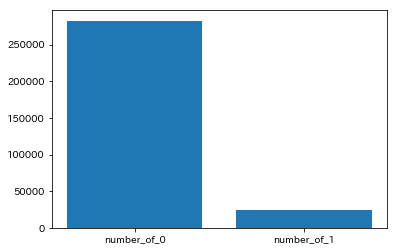

In [32]:
# barメソッドを使用し、棒グラフで表示
plt.bar([1,2], [number_of_0, number_of_1], 
             tick_label=['number_of_0', 'number_of_1'])

### describeメソッド

In [33]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### 欠損値の有無を確認
### →欠損値有り

# 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。
## ①課題
- 欠損値の割合を確認するとnull値になるカラムがかなりあると同時に欠損値の割合を見ると7０％から４０％の物が多いので
- 単純に欠損値があるからとカラムを削除して良いのだろうかと疑問が残る実際に欠損値があるカラムを削除するとカラム数が122から５７カラムにまで減る
- 扱うデータがアプリケーション訓練データだけで肝心のクレジットビューローのデータ分析を考慮していないので相関関係がダイレクトに作用しないのではと考えられる
- リアルタイムでの経済状況を特徴量に盛り込んでいないので、突発の経済問題等に対応できない

## ②疑問
- 欠損値の補完を行う際はどの値で補完すれば、よりよい精度の学習モデルが作成できるのか？
- 欠損値は補完ではなく削除をした方が精度が向上するか？


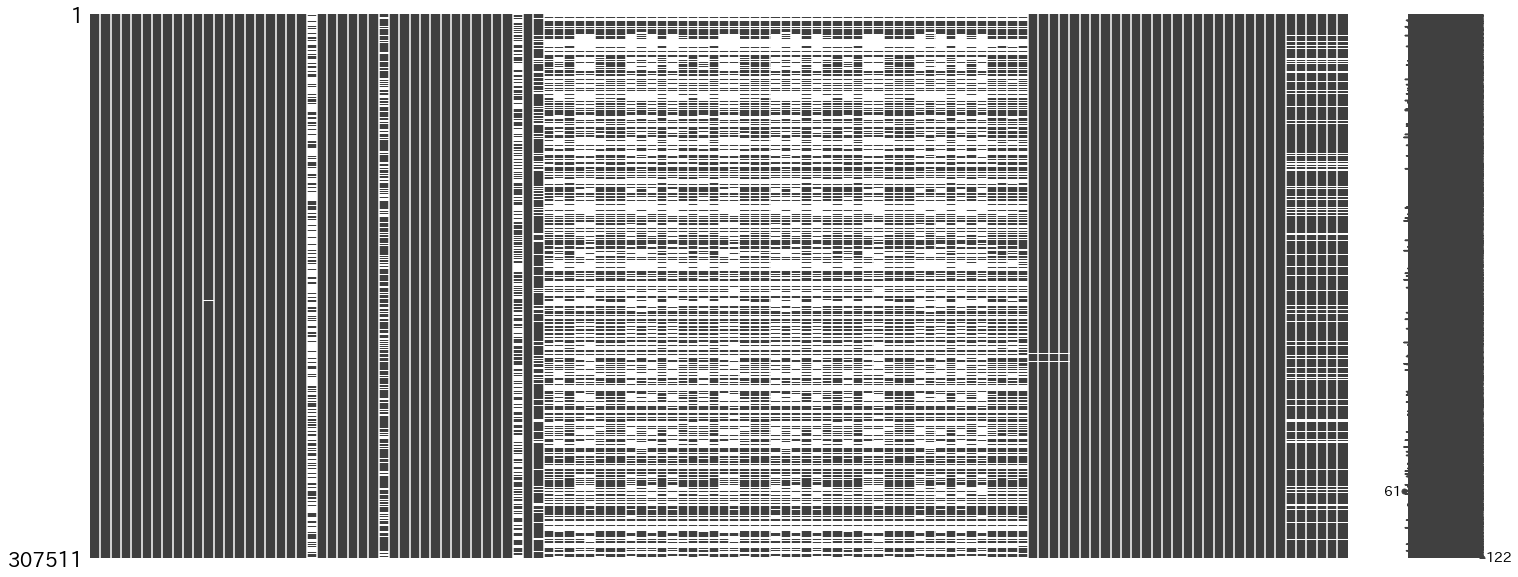

In [34]:
msno.matrix(df)

In [35]:
# isnullメソッドとsumメソッドの組み合わせで各列の欠損値の数を表示
df1 = pd.DataFrame({
                        'total' : len(df),
                        'missing_ratio' : df.isnull().sum()/len(df)
                        })
df1.sort_values('missing_ratio',ascending=False)

,total,missing_ratio
COMMONAREA_MEDI,307511,0.698723
COMMONAREA_AVG,307511,0.698723
COMMONAREA_MODE,307511,0.698723
NONLIVINGAPARTMENTS_MODE,307511,0.694330
NONLIVINGAPARTMENTS_AVG,307511,0.694330
NONLIVINGAPARTMENTS_MEDI,307511,0.694330
FONDKAPREMONT_MODE,307511,0.683862
LIVINGAPARTMENTS_MODE,307511,0.683550
LIVINGAPARTMENTS_AVG,307511,0.683550
LIVINGAPARTMENTS_MEDI,307511,0.683550


# 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めましょう。過程で新しい疑問点などが生まれた場合は、加えていってください。

課題合格の条件として、表やグラフを 合計15個以上 出力してください。そして、それに対してマークダウンを使い考察を加えていきましょう。

### 特徴量の重要度の算出

- カテゴリカル変数をワンホットエンコーディング

In [43]:
#デフォルトでは欠損値NaNは除外して処理される。
#NaNも一つのカテゴリーとしてダミー変数化したい場合は、引数dummy_na=Trueとする。ここで重要なのは,dummy_na=Trueはカテゴリ変数のNaNだけを０に変換し
#数値型のカラムのNaNは０に変換しない。
df_dummies = pd.get_dummies(df,dummy_na=True)
df_dummies = df_dummies.fillna(0)
df_dummies

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,100002,1,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,1,0,0,1,0,0
1,100003,0,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,0,1,0,0
2,100004,0,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,1,0,0,1
3,100006,0,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,1,0,0,1
4,100007,0,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,1,0,0,1
5,100008,0,0,99000.000,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0,0,0,0,0,0,1,0,0,1
6,100009,0,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0,0,0,0,0,0,1,0,0,1
7,100010,0,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0,0,0,0,0,0,1,0,0,1
8,100011,0,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,365243,...,0,0,0,0,0,0,1,0,0,1
9,100012,0,0,135000.000,405000.0,20250.0,405000.0,0.019689,-14469,-2019,...,0,0,0,0,0,0,1,0,0,1


In [45]:
#　学習データのみを抽出
X_train = df_dummies.drop(['SK_ID_CURR', 'TARGET'], axis=1)
X_train

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,1,0,0,1,0,0
1,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0,0,0,1,0,0
2,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,1,0,0,1
3,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,1,0,0,1
4,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,1,0,0,1
5,0,99000.000,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,-477,...,0,0,0,0,0,0,1,0,0,1
6,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,-1213.0,-619,...,0,0,0,0,0,0,1,0,0,1
7,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,-4597.0,-2379,...,0,0,0,0,0,0,1,0,0,1
8,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,365243,-7427.0,-3514,...,0,0,0,0,0,0,1,0,0,1
9,0,135000.000,405000.0,20250.0,405000.0,0.019689,-14469,-2019,-14437.0,-3992,...,0,0,0,0,0,0,1,0,0,1


In [46]:
y_train = df_dummies.loc[:,'TARGET']
y_train

0         1
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        1
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        1
41        0
42        1
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
53        0
54        0
55        0
56        0
57        0
58        0
59        0
60        0
61        0
62        0
63        0
64        0
65        0
66        0
67        0
68        0
69        0
70        0
71        0
72        0
73        0
74        0
75        0
76        0
77        0
78        0
79        0
80        0
81        1
82        0
83  

In [47]:
df_dummies.isnull().sum().sum()

0

- ランダムフォレストモデルで学習モデルを作成

In [48]:
# RandomForestClassifierメソッドをインポート
from sklearn.ensemble import RandomForestClassifier

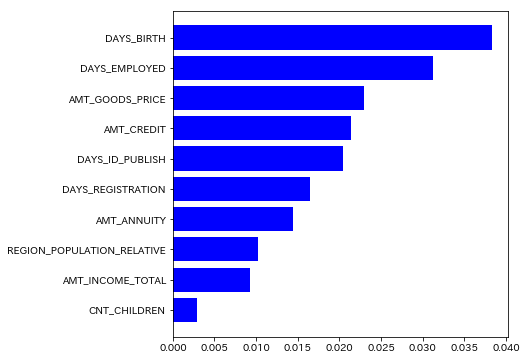

In [49]:
# RandomForestClassifier　モデルを作成　(決定木の数は　100、深度は10)
clf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)

# 学習
clf.fit(X_train, y_train)

features = X_train.columns

importances = clf.feature_importances_[:10]

#　argsortメソッドで重要度をソートしたもののインデックスを抽出
sort_importance_index = np.argsort(clf.feature_importances_[:10])


plt.figure(figsize=(6,6))
plt.barh(range(len(sort_importance_index )), importances[sort_importance_index ], color='b', align='center')
plt.yticks(range(len(sort_importance_index )), features[sort_importance_index ])
plt.show()

### 散布図行列の作成

In [58]:
# seabornメソッドをインポート
import seaborn as sns

In [62]:
#重要度のカラムを出力
features[sort_importance_index ]

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE',
       'AMT_ANNUITY', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_BIRTH'],
      dtype='object')

In [66]:
df_columns = df_dummies.columns
df_for_plot = df_dummies[['TARGET','DAYS_BIRTH','DAYS_EMPLOYED','AMT_GOODS_PRICE','AMT_CREDIT','DAYS_ID_PUBLISH']]

/anaconda3/envs/DIC/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/DIC/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/DIC/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


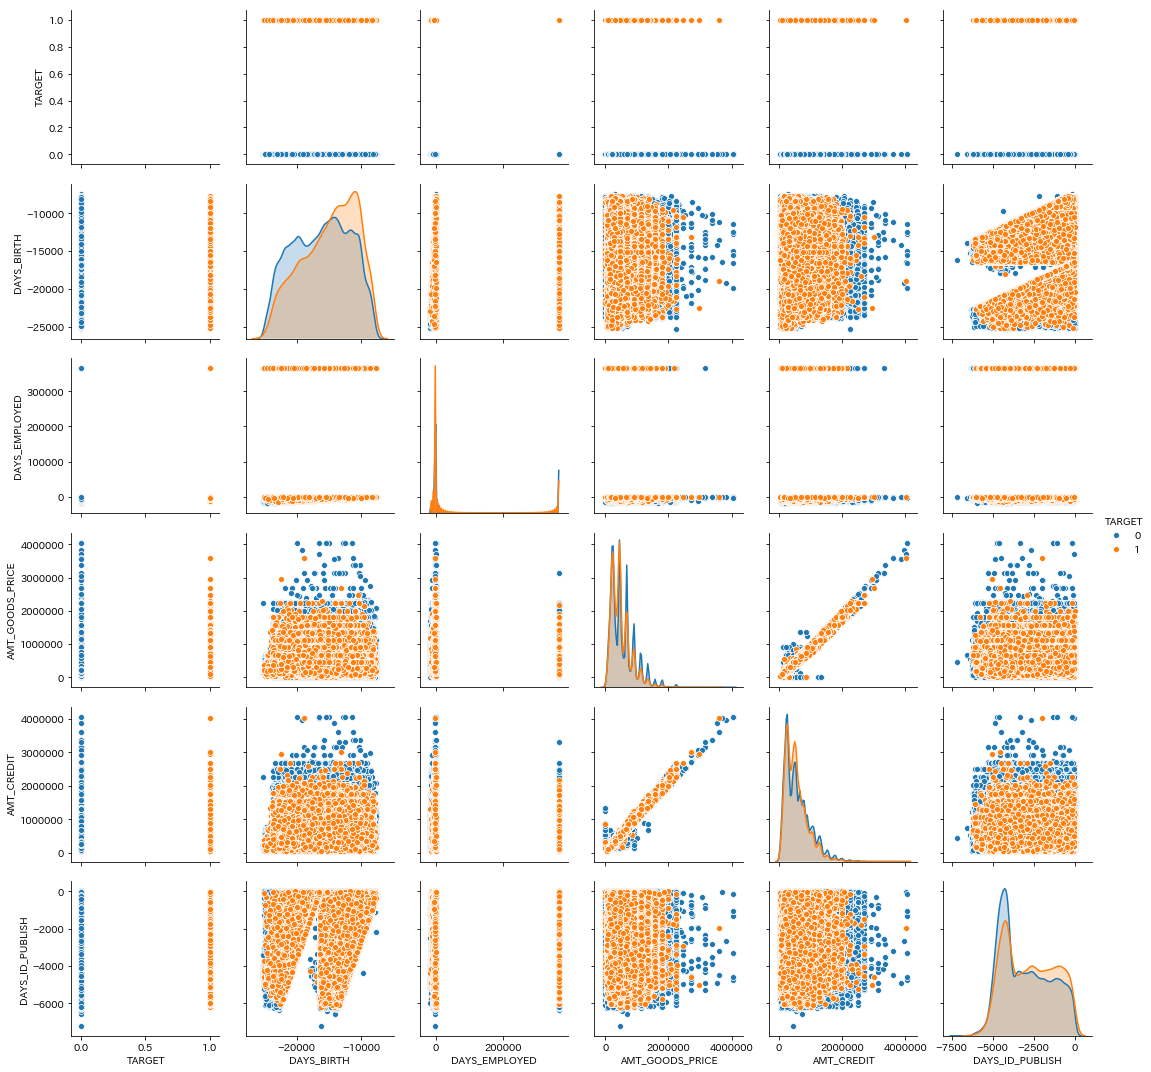

In [67]:
sns.pairplot(df_for_plot, hue='TARGET')

In [74]:
#ランダムフォレスト で重要度を出し上位５つの中でさらに相関係数を出し分析する
df_for_plot.corr()

,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_ID_PUBLISH
TARGET,1.000000,0.078239,-0.044932,-0.039565,-0.030369,0.051457
DAYS_BIRTH,0.078239,1.000000,-0.615864,-0.053943,-0.055436,0.272691
DAYS_EMPLOYED,-0.044932,-0.615864,1.000000,-0.064419,-0.066838,-0.272378
AMT_GOODS_PRICE,-0.039565,-0.053943,-0.064419,1.000000,0.986687,-0.009419
AMT_CREDIT,-0.030369,-0.055436,-0.066838,0.986687,1.000000,-0.006575
DAYS_ID_PUBLISH,0.051457,0.272691,-0.272378,-0.009419,-0.006575,1.000000


与信額(AMT_CREDIT)とローン商品の限度額(AMT_GOODS_PRICE)を見るとローンを完済していない人は当然与信度が低く借りれる額も少ない。それなのに完済出来ていない。

DAYS_EMPLOYEDとDAYS_BIRTHは負の相関が−６と割合高いが図を見ると高齢者ほど返済率が低く高齢者の雇用の問題が出ている。